<a href="https://colab.research.google.com/github/manasik29/Time_Series_Forecasting/blob/main/Forecasting_Airlines_Passenger_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forecast the Airlines Passengers data set. 

Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. 

Finally which model you will use for 
Forecasting.


**Load libraries and data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_excel('/content/Airlines+Data.xlsx')
df_airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
df_airline.tail()

,Month,Passengers
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271
95,2002-12-01,306


**EDA**

In [3]:
df_airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
df_airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [7]:
#Get Month column as index of data
df_airline.set_index('Month',inplace=True)

In [8]:
df_airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


**Visualisations**

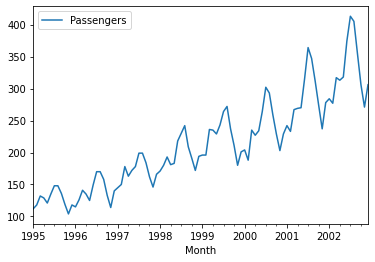

In [9]:
df_airline.plot()

- There is an upward trending data and there is seasonality in our data.

Histogram

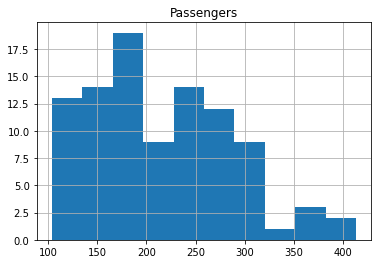

In [10]:
df_airline.hist()
plt.show()

Distplot

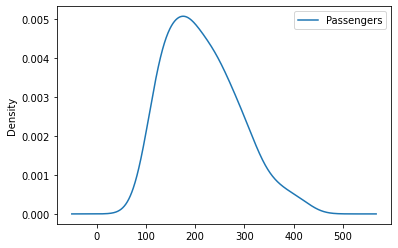

In [11]:
df_airline.plot(kind='kde')
plt.show()

- We can observe this a normally distributed data.

Lagplot

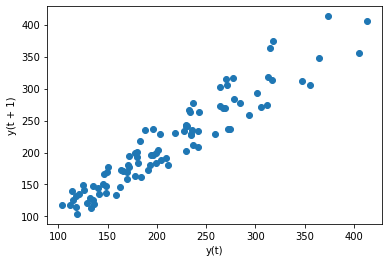

In [12]:
from pandas.plotting import lag_plot
lag_plot(df_airline)

In [13]:
airline=pd.read_excel('/content/Airlines+Data.xlsx')
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [15]:
#Get month and year columns in our data

airline["month"] = airline.Month.dt.strftime("%b") # month extraction
airline["year"] = airline.Month.dt.strftime("%Y") # year extraction
airline.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


Heatmap

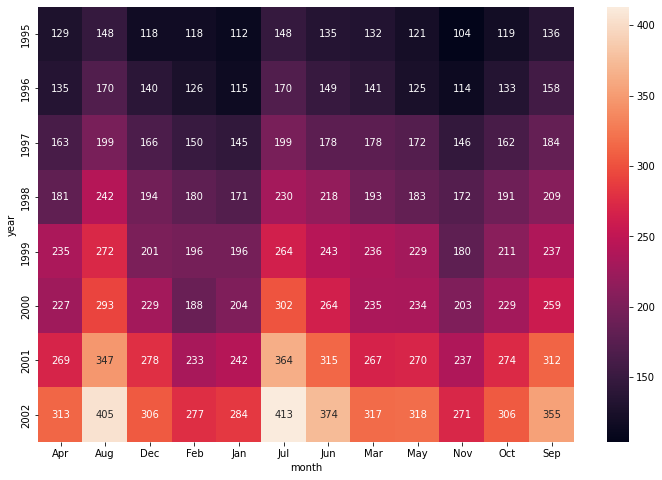

In [16]:
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airline,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

- Years 2000 and after have higher number of passengers.
- Months Jul and Aug fairly high passengers and months Nov and Dec have lower passengers tarvelling. 

Boxplot

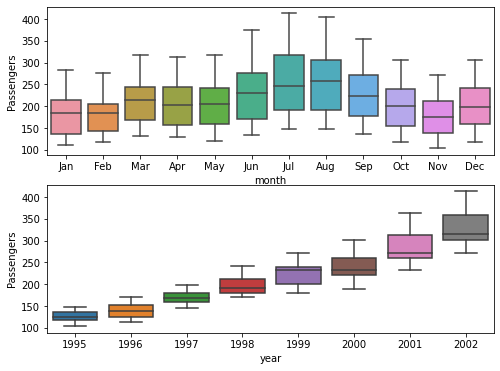

In [17]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=airline)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=airline)

- Similar observations can be concluded from boxplot as well.

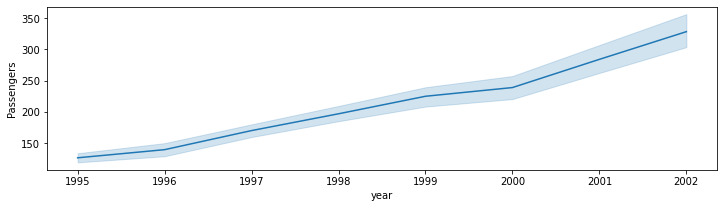

In [18]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airline)

ACF Plot

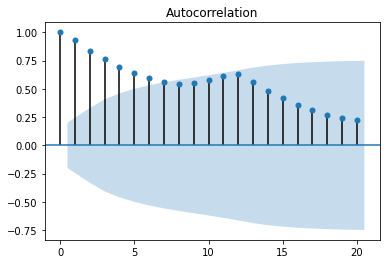

In [94]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(airline["Passengers"])                                                   q=6

PACF Plot

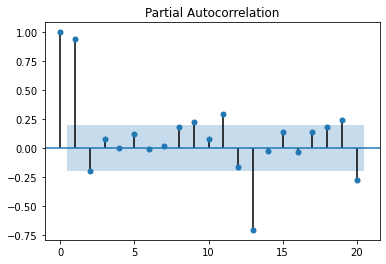

In [93]:
pacf = plot_pacf(airline["Passengers"])                               p=10

**Data Preprocessing**

In [19]:
airline.shape

(96, 4)

In [20]:
airline

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [21]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ KB


In [22]:
#Convert dtype of year 
airline['year'] = airline['year'].astype("int64")

In [23]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.1+ KB


**Creating dummy variables**

In [25]:
#OHE for month column
airline1 = pd.get_dummies(airline)
airline1

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
x=np.arange(1,97)

In [39]:
#timesteps
t=pd.Series(data=x)
t

0      1
1      2
2      3
3      4
4      5
      ..
91    92
92    93
93    94
94    95
95    96
Length: 96, dtype: int64

In [43]:
#timesteps square values
t_sqr=pd.Series(data=(x*x))
t_sqr

0        1
1        4
2        9
3       16
4       25
      ... 
91    8464
92    8649
93    8836
94    9025
95    9216
Length: 96, dtype: int64

In [54]:
#log of number of passengers
airline1['log_passengers'] = np.log(airline1['Passengers'])

In [55]:
airline1['t'] = t

In [57]:
airline1['t_sqr'] = t_sqr

In [58]:
airline1

,Month,Passengers,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,log_passengers,t,t_sqr
0,1995-01-01,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.718499,1,1
1,1995-02-01,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.770685,2,4
2,1995-03-01,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,4.882802,3,9
3,1995-04-01,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.859812,4,16
4,1995-05-01,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,4.795791,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002,0,1,0,0,0,0,0,0,0,0,0,0,6.003887,92,8464
92,2002-09-01,355,2002,0,0,0,0,0,0,0,0,0,0,0,1,5.872118,93,8649
93,2002-10-01,306,2002,0,0,0,0,0,0,0,0,0,0,1,0,5.723585,94,8836
94,2002-11-01,271,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.602119,95,9025


**Split Train and Test data**

In [59]:
Train = airline1.head(84)
Test = airline1.tail(12)

**Model Building**

In [60]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()                                                              #Fit the train model
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))                                              #predict on test data   
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))                              #calculate eoot mean sqr error 
rmse_linear

53.19923653480278

In [61]:
#Exponential

Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315654

In [62]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sqr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sqr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933164

In [63]:
#Additive seasonality 

add_sea = smf.ols('Passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.81978481421817

In [64]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sqr+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['month_Jan','month_Feb','month_Mar','month_Apr','month_May','month_Jun','month_Jul','month_Aug','month_Sep','month_Oct','month_Nov','t','t_sqr']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.3608176120952

In [65]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.06320204708632

In [66]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+month_Jan+month_Feb+month_Mar+month_Apr+month_May+month_Jun+month_Jul+month_Aug+month_Sep+month_Oct+month_Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

10.519172544323876

In [67]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


- We can see here ***Multiplicative Additive Seasonality*** giving us best results as the RMSE is the lowest for this data. 